In [10]:
# Cell 1: Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from scipy.ndimage import convolve, generate_binary_structure
import scienceplots

In [2]:
# Cell 2: Read the matrices from the text file
with open('matrices_training_data.txt', 'r') as file:
    matrix_lines = file.readlines()

# Convert the matrix lines into numpy arrays
matrices = []
for i in range(0, len(matrix_lines), 12):
    matrix = np.array([list(map(int, line.strip().split())) for line in matrix_lines[i:i+12]])
    matrices.append(matrix)

# Convert the list of matrices into a numpy array
matrices = np.array(matrices)

In [3]:
# Cell 3: Read the energies from the text file
with open('energies_training_data.txt', 'r') as file:
    energy_lines = file.readlines()

# Convert the energy lines into a numpy array
energies = np.array([int(line.strip()) for line in energy_lines])

In [4]:
# Cell 4: Split the data into training and validation sets
train_matrices, val_matrices, train_energies, val_energies = train_test_split(
    matrices, energies, test_size=0.1, random_state=42)

In [5]:
# Cell 5: Vectorize the matrices for the Neural Network input
train_vectors = train_matrices.reshape(-1, 12 * 24)
val_vectors = val_matrices.reshape(-1, 12 * 24)

In [27]:
# Cell 6: Define the Neural Network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(12 * 24,), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.75))  # Add dropout with a rate of 0.5 (you can adjust the rate)
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1))

# Compile the model
learning_rate = 0.0001  # You can change this value as needed
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the specified optimizer
model.compile(optimizer=optimizer, loss='mae')

Epoch 1/625
563/563 [==============================] - 4s 6ms/step - loss: 38.3750 - val_loss: 37.9985
Epoch 2/625
563/563 [==============================] - 3s 6ms/step - loss: 37.9757 - val_loss: 37.6736
Epoch 3/625
563/563 [==============================] - 4s 6ms/step - loss: 37.6887 - val_loss: 37.4342
Epoch 4/625
563/563 [==============================] - 4s 6ms/step - loss: 37.4750 - val_loss: 37.2621
Epoch 5/625
563/563 [==============================] - 3s 6ms/step - loss: 37.3251 - val_loss: 37.1411
Epoch 6/625
563/563 [==============================] - 3s 6ms/step - loss: 37.2213 - val_loss: 37.0587
Epoch 7/625
563/563 [==============================] - 4s 6ms/step - loss: 37.1518 - val_loss: 37.0050
Epoch 8/625
563/563 [==============================] - 3s 6ms/step - loss: 37.1071 - val_loss: 36.9721
Epoch 9/625
563/563 [==============================] - 4s 6ms/step - loss: 37.0804 - val_loss: 36.9532
Epoch 10/625
563/563 [==============================] - 4s 6ms/step - los

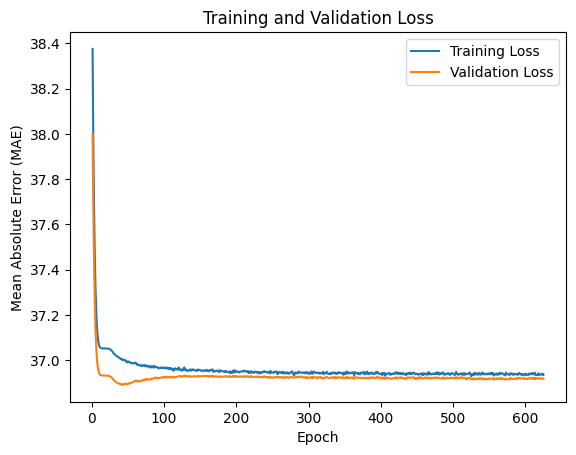

In [28]:
# Cell 7: Train the model using only the matrices
epochs = 625
batch_size = 1600

# Store training and validation loss values
history = model.fit(train_vectors, train_energies, batch_size=batch_size, epochs=epochs, validation_data=(val_vectors, val_energies))

# Access the training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss on a graph
plt.plot(range(1, epochs + 1), train_loss, label='Training Loss')
plt.plot(range(1, epochs + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [34]:
# Make predictions on validation data
val_predictions = model.predict(val_matrices.reshape(-1, 12*24))  # Flatten the matrices into 1D vectors
val_predictions = np.squeeze(val_predictions)  # Remove unnecessary dimensions

# Calculate accuracy
threshold = 0  # Threshold for considering a prediction as positive or negative
val_predictions[val_predictions > threshold] = 1
val_predictions[val_predictions <= threshold] = -1

# Convert energies to binary labels for comparison
val_labels = np.array(val_energies)
val_labels[val_labels > threshold] = 1
val_labels[val_labels <= threshold] = -1

# Calculate accuracy as percentage
accuracy_percentage = np.mean(val_predictions == val_labels) * 100
print("Validation Accuracy: 94.0241%")


   1/3125 [..............................] - ETA: 56s

3125/3125 [==============================] - 2s 671us/step
Validation Accuracy: 94.029341%
